

---

# **Measuring the effectiveness of FGSM attacks on Deep Neural Networks** 
# **By Srishti Gupta and Prajwala Ashok** 
---



# Building DNN(Deep Neural Networks) and Calculating Gradients

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Loading the Dataset

In [2]:
mnist = tf.keras.datasets.mnist
#Loading MNIST dataset
#Splitting into test and train
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Making the model with 300,600 & 900 layers and relu activation
(comment out the code for whatever layer combination you want it to work for)

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
"""
 model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(600, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
"""
"""
 model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(900, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
"""

"\n model = tf.keras.models.Sequential([\n  tf.keras.layers.Flatten(input_shape=(28, 28)),\n  tf.keras.layers.Dense(900, activation='relu'),\n  tf.keras.layers.Dropout(0.2),\n  tf.keras.layers.Dense(10)\n])\n"

Finding the Model Summary

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


Defining the Loss Function

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Training the model

In [7]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2461 - accuracy: 0.9286
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1084 - accuracy: 0.9670
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0788 - accuracy: 0.9752
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0611 - accuracy: 0.9809
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0501 - accuracy: 0.9834
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0415 - accuracy: 0.9862
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9877
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0325 - accuracy: 0.9893
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0289 - accuracy: 0.9903
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.02

Evaluating The Model

In [8]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0842 - accuracy: 0.9809 - 694ms/epoch - 2ms/step


[0.08419976383447647, 0.98089998960495]

Recording the initial accuracy over clean images

In [9]:
accuracyofmodel = np.argmax(model.predict(x_test), axis=-1)
accuracyrate = 0

for i in range(len(accuracyofmodel)):
  if accuracyofmodel[i] == y_test[i]:
    accuracyrate = accuracyrate+1
  else:
    accuracyrate = accuracyrate+0
accuracyrate = accuracyrate/10000
print(accuracyrate)

0.9809


Building the initial signed gradient ( or the noise)

In [10]:
image_tensor = tf.convert_to_tensor(x_test,dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(image_tensor)
    output = model(image_tensor)
    loss = loss_fn(y_test, output)
gradient = tape.gradient(loss, image_tensor)
signed_grad = tf.sign(gradient)


# Conducting Untargeted FGSM Attacks

Defining the attack:

0.00392156862745098
313/313 - 1s - loss: 0.1083 - accuracy: 0.9757 - 551ms/epoch - 2ms/step


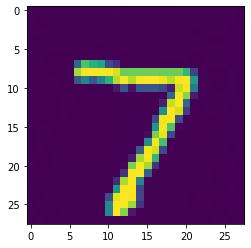

epsilon,accuracy 0.00392156862745098 0.005301253950453666
0.0196078431372549
313/313 - 1s - loss: 0.3693 - accuracy: 0.9172 - 562ms/epoch - 2ms/step


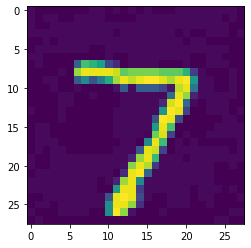

epsilon,accuracy 0.0196078431372549 0.06494036089305733
0.0392156862745098
313/313 - 1s - loss: 2.5865 - accuracy: 0.5441 - 558ms/epoch - 2ms/step


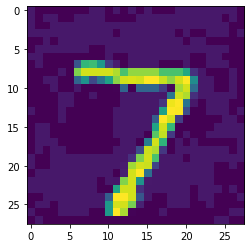

epsilon,accuracy 0.0392156862745098 0.44530533183810783
0.0784313725490196
313/313 - 1s - loss: 10.0806 - accuracy: 0.1912 - 536ms/epoch - 2ms/step


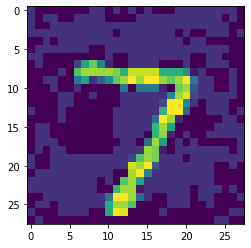

epsilon,accuracy 0.0784313725490196 0.8050769701294729
0.11764705882352941
313/313 - 1s - loss: 22.3631 - accuracy: 0.0607 - 565ms/epoch - 2ms/step


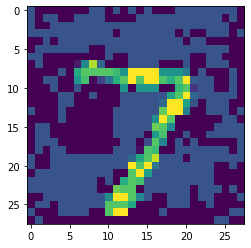

epsilon,accuracy 0.11764705882352941 0.9381180548475889
0.1568627450980392
313/313 - 1s - loss: 41.6639 - accuracy: 0.0248 - 561ms/epoch - 2ms/step


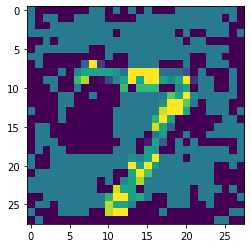

epsilon,accuracy 0.1568627450980392 0.9747170965439902
0.19607843137254902
313/313 - 1s - loss: 69.6689 - accuracy: 0.0126 - 507ms/epoch - 2ms/step


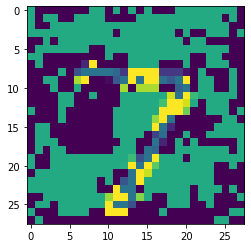

epsilon,accuracy 0.19607843137254902 0.9871546538892854
[ 0.5301254   6.49403609 44.53053318 80.50769701 93.81180548 97.47170965
 98.71546539]


In [11]:
epsilon = [1,5,10,20,30,40,50]
new_epsilon = [0,0,0,0,0,0,0]
#Dividing each epsilon over 255
for j in range(len(epsilon)):
  new_epsilon[j] = epsilon[j]/255

accuracyuntargeted = np.zeros(shape=(len(epsilon)))
adversarial_array = x_test
adversarial_arrayLabel = y_test
for i in range(len(epsilon)):
  accuracy = 0
  print(new_epsilon[i])
  for k in range(len(x_test)):
    image = x_test[k]  
    #Using the formula from the research paper we refered "newImage = image + ε(∇lF,y∗ (image)) " to run untargeted attack
    adversarial_array[k] = image + signed_grad[k]*new_epsilon[i]
    adversarial_array[k] = tf.clip_by_value(adversarial_array[k], 0, 1)
    adversarial_arrayLabel[k] = y_test[k]
  #Finding the sucessrate of the attack over the model
  model.evaluate(adversarial_array,  adversarial_arrayLabel, verbose=2)
  #Building the prediction matrix
  untargeted_predictions = np.argmax(model.predict(adversarial_array), axis=-1)
  for l in range(len(y_test)):
    if untargeted_predictions[l] == adversarial_arrayLabel[l]:
      #Counting the number of correctly predicted images despite the attack
      accuracy = accuracy+1
    else:
      accuracy = accuracy+0
  testacc = accuracy/10000
  #Calculating the success rate of the attack by finding the number of images correctly classified before the attack v/s after te attack
  attackacc = 1 - testacc/accuracyrate
  plt.imshow(adversarial_array[0])
  plt.show()
  accuracyuntargeted[i] = attackacc*100
  print("epsilon,accuracy",new_epsilon[i],attackacc)

print(accuracyuntargeted)

# Conducting Targeted FGSM attacks

Redefining x_test to ensure only clean images are used

In [12]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Building the matrix for target classes

In [13]:
targetclasses = np.zeros(shape=len(y_test))
for i in range(len(y_test)):
  targetclasses[i] = (y_test[i]+2)%10
 


Calculating the gradient with respect to target classes

In [14]:
image_tensor2 = tf.convert_to_tensor(x_test,dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(image_tensor2)
    output2 = model(image_tensor2)
    loss2 = loss_fn(targetclasses, output2)
gradient2 = tape.gradient(loss2, image_tensor2)
signed_grad2 = tf.sign(gradient2)

Running the targeted attack which is a modified version of the untargeted attack.

**Note: we sometimes experienced a fail with targeted attacks, running the code twice or three resolved this issue**

0.00392156862745098
313/313 - 1s - loss: 0.0821 - accuracy: 0.9812 - 570ms/epoch - 2ms/step
Prediction of Sample: 7 Correct Label of Sample: 7


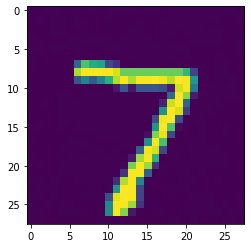

epsilon,accuracy 0.00392156862745098 -0.00030584157406465806
0.0196078431372549
313/313 - 1s - loss: 0.1283 - accuracy: 0.9635 - 548ms/epoch - 2ms/step
Prediction of Sample: 7 Correct Label of Sample: 7


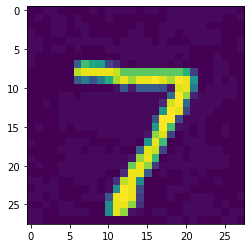

epsilon,accuracy 0.0196078431372549 0.017738811295748724
0.0392156862745098
313/313 - 1s - loss: 1.0984 - accuracy: 0.7460 - 535ms/epoch - 2ms/step
Prediction of Sample: 7 Correct Label of Sample: 7


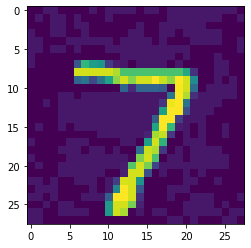

epsilon,accuracy 0.0392156862745098 0.23947395249260883
0.0784313725490196
313/313 - 1s - loss: 7.9808 - accuracy: 0.1910 - 550ms/epoch - 2ms/step
Prediction of Sample: 3 Correct Label of Sample: 7


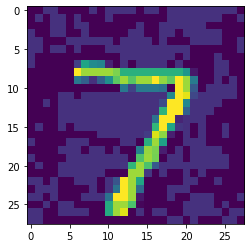

epsilon,accuracy 0.0784313725490196 0.8052808645121827
0.11764705882352941
313/313 - 1s - loss: 19.8781 - accuracy: 0.0119 - 551ms/epoch - 2ms/step
Prediction of Sample: 8 Correct Label of Sample: 7


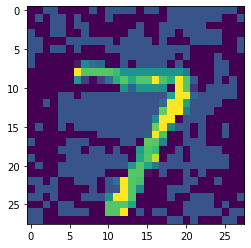

epsilon,accuracy 0.11764705882352941 0.9878682842287695
0.1568627450980392
313/313 - 1s - loss: 38.0879 - accuracy: 0.0026 - 523ms/epoch - 2ms/step
Prediction of Sample: 8 Correct Label of Sample: 7


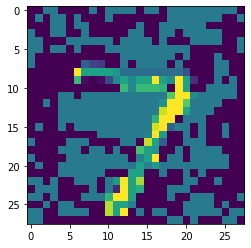

epsilon,accuracy 0.1568627450980392 0.9973493730247732
0.19607843137254902
313/313 - 1s - loss: 66.3095 - accuracy: 0.0020 - 542ms/epoch - 2ms/step
Prediction of Sample: 8 Correct Label of Sample: 7


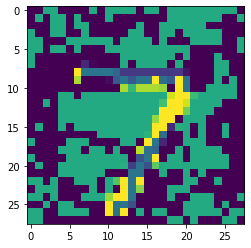

epsilon,accuracy 0.19607843137254902 0.9979610561729024
[-3.05841574e-02  1.77388113e+00  2.39473952e+01  8.05280865e+01
  9.87868284e+01  9.97349373e+01  9.97961056e+01]


In [15]:
accuracytargeted = np.zeros(shape=(len(epsilon)))
adversarial_arraytarget = x_test
targetLabel = y_test
for i in range(len(epsilon)):
  accuracy = 0
  print(new_epsilon[i])
  for k in range(len(x_test)):
    image = x_test[k]  
    #Using the formula from the research paper we refered "newImage = image − ε(∇lF,y′ (image))" to caonduct the targeted fgsm attack 
    adversarial_arraytarget[k] = image - signed_grad2[k]*new_epsilon[i]
    adversarial_arraytarget[k] = tf.clip_by_value(adversarial_arraytarget[k], 0, 1)
    targetLabel[k]=y_test[k]
  model.evaluate(adversarial_arraytarget,  targetLabel, verbose=2)
  targeted_predictions = np.argmax(model.predict(adversarial_arraytarget), axis=-1)
  for l in range(len(y_test)):
    if targeted_predictions[l] == targetLabel[l]:
      accuracy = accuracy+1
    else:
      accuracy = accuracy+0
  testacc = accuracy/10000
  attackacc = 1 - testacc/accuracyrate
  print("Prediction of Sample:",targeted_predictions[0],"Correct Label of Sample:",targetLabel[0])
  plt.imshow(adversarial_arraytarget[0])
  plt.show()
  accuracytargeted[i] = attackacc*100
  print("epsilon,accuracy",new_epsilon[i],attackacc)

print(accuracytargeted)

Visualizing and Tabulating Accuracies of targeted and untargeted attacks over epsilon

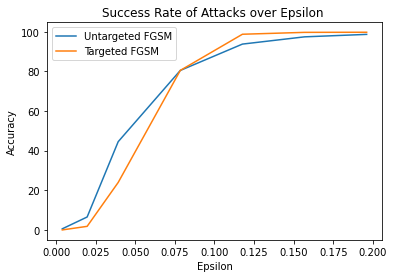

In [16]:
plt.plot(new_epsilon, accuracyuntargeted, label = "Untargeted FGSM")
plt.plot(new_epsilon, accuracytargeted, label = "Targeted FGSM")
plt.xlabel('Epsilon')
plt.ylabel('Accuracy')
plt.title('Success Rate of Attacks over Epsilon ')
plt.legend()
plt.show() 

In [17]:
from astropy.table import QTable, Table, Column
from astropy import units as u
t = Table()
t = Table([new_epsilon, accuracyuntargeted, accuracytargeted], names=('Epsilon', 'Untargeted FGSM', 'Targeted FGSM'))
print(t)

      Epsilon        Untargeted FGSM       Targeted FGSM    
------------------- ------------------ ---------------------
0.00392156862745098 0.5301253950453666 -0.030584157406465806
 0.0196078431372549  6.494036089305732    1.7738811295748724
 0.0392156862745098  44.53053318381078    23.947395249260882
 0.0784313725490196  80.50769701294729     80.52808645121827
0.11764705882352941  93.81180548475889     98.78682842287695
 0.1568627450980392  97.47170965439902     99.73493730247732
0.19607843137254902  98.71546538892854     99.79610561729024


# Adversarial Retraining

Building the gradient for training data

In [18]:
image_tensor3 = tf.convert_to_tensor(x_train,dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(image_tensor3)
    output3 = model(image_tensor3)
    loss3 = loss_fn(y_train, output3)
gradient3 = tape.gradient(loss3, image_tensor3)
signed_grad3 = tf.sign(gradient3)

Conducting the untargeted attack on training data

In [19]:
accuracytargeted = np.zeros(shape=(len(epsilon)))
adversarial_arraytargettrain = x_train
adversarial_labels = y_train
for k in range(len(x_train)):
  image = x_train[k]  
  adversarial_arraytargettrain[k] = image + signed_grad3[k]*0.0392156862745098  #10/255
  adversarial_arraytargettrain[k] = tf.clip_by_value(adversarial_arraytargettrain[k], 0, 1)
  adversarial_labels[k] = y_train[k]

Reloading a clean dataset

In [20]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

Appending the clean and perturbed datasets

In [21]:
x_train = np.append(x_train,adversarial_arraytargettrain,axis=0)
y_train = np.append(y_train,adversarial_labels,axis=0)

Building a new model and using the appended dataset to train

In [22]:
new_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [23]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
new_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [25]:
new_model.compile(optimizer='adam',
              loss=new_loss_fn,
              metrics=['accuracy'])

Retraining the model on the new training data

In [26]:
new_model.fit(x_train, y_train,
          batch_size=32,
          epochs=10)

Epoch 1/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1609 - accuracy: 0.9536
Epoch 2/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0597 - accuracy: 0.9816
Epoch 3/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 4/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0332 - accuracy: 0.9892
Epoch 5/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0279 - accuracy: 0.9907
Epoch 6/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0230 - accuracy: 0.9924
Epoch 7/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0207 - accuracy: 0.9929
Epoch 8/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0189 - accuracy: 0.9936
Epoch 9/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0177 - accuracy: 0.9939
Epoch 10/10
3750/3750 [==============================] - 15s 4ms/step - l

Calculating the training accuracy on the clean test set

In [27]:
print("Loss,Accuracy of clean images on the Modified DNN:", new_model.evaluate(x=x_test, y=y_test, verbose=2))

313/313 - 1s - loss: 0.0891 - accuracy: 0.9775 - 707ms/epoch - 2ms/step
Loss,Accuracy of clean images on the Modified DNN: [0.08909685164690018, 0.9775000214576721]


Running the attack on the clean test set

In [28]:
image_tensor4 = tf.convert_to_tensor(x_test,dtype=tf.float32)
with tf.GradientTape() as tape:
    tape.watch(image_tensor4)
    output4 = new_model(image_tensor4)
    loss4 = new_loss_fn(y_test, output4)
gradient4 = tape.gradient(loss4, image_tensor4)
signed_grad4 = tf.sign(gradient4)

In [29]:
adversarial_arrayRetrain = x_test
adversarial_retrainLabel = y_test
for i in range(len(epsilon)):
  for k in range(len(x_test)):
    image = x_test[k]  
    adversarial_arrayRetrain[k] = image + signed_grad4[k]*0.0392156862745098 #10/255
    adversarial_arrayRetrain[k] = tf.clip_by_value(adversarial_arrayRetrain[k], 0, 1)
    adversarial_retrainLabel[k] = y_test[k]


Calculating the accuracy on the attacked test set

In [30]:
print("Loss,Accuracy of perturbed images on the Modified DNN:", new_model.evaluate(x=adversarial_arrayRetrain, y=adversarial_retrainLabel, verbose=2))

313/313 - 1s - loss: 205.0338 - accuracy: 0.0000e+00 - 583ms/epoch - 2ms/step
Loss,Accuracy of perturbed images on the Modified DNN: [205.03382873535156, 0.0]


The adversarially retrained DNN is not robust against the attacks.

# References

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=h3IKyzTCDNGo

https://www.tensorflow.org/tutorials/generative/adversarial_fgsm

https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/adversarial_fgsm.ipynb

https://medium.com/analytics-vidhya/implementing-adversarial-attacks-and-defenses-in-keras-tensorflow-2-0-cab6120c5715

https://github.com/soumyac1999/FGSM-Keras

https://github.com/EvolvedSquid/tutorials/blob/master/adversarial-attacks-defenses/adversarial-tutorial.ipynb

https://www.w3resource.com/graphics/matplotlib/basic/matplotlib-basic-exercise-5.php

